# Методы обработки пропущенных значений
## Отбрасывание записей и признаков
Первая техника — самая простая из всех. Она предполагает простое удаление записей или признаков, в которых содержатся пропуски. 
Специалисты рекомендуют при использовании метода удаления придерживаться следующих правил: удаляйте столбец, если число пропусков в нем более 30-40 %. В остальных случаях лучше удалять записи.
Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. 

## Основные параметры метода:

 - axis — ось, по которой производится удаление (по умолчанию 0 — строки).
 - how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 
 - thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем , где  — число признаков (если ).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sber_data = pd.read_csv('data/sber_data.csv', sep=',')
# Находим средний процент по столбцам
cols_null_precent = sber_data.isnull().mean() * 100
# Сортируем по убыванию
cols_with_null = cols_null_precent[cols_null_precent>0].sort_values(ascending=False)

In [6]:
# Создаем копию
drop_data = sber_data.copy()
# Задаем минимальный порог 70%
thresh = drop_data.shape[0] * 0.7
# Удаляем столбцы, в которых более 30% пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
drop_data = drop_data.dropna(how='any', axis=0)
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

## Заполнение недостающих значений константами
Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков. 
Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе метода является распределение признаков с пропусками. Давайте выведем их на экран. 

array([[<Axes: title={'center': 'hospital_beds_raion'}>,
        <Axes: title={'center': 'preschool_quota'}>,
        <Axes: title={'center': 'school_quota'}>],
       [<Axes: title={'center': 'life_sq'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'metro_min_walk'}>],
       [<Axes: title={'center': 'metro_km_walk'}>,
        <Axes: title={'center': 'railroad_station_walk_km'}>,
        <Axes: title={'center': 'railroad_station_walk_min'}>]],
      dtype=object)

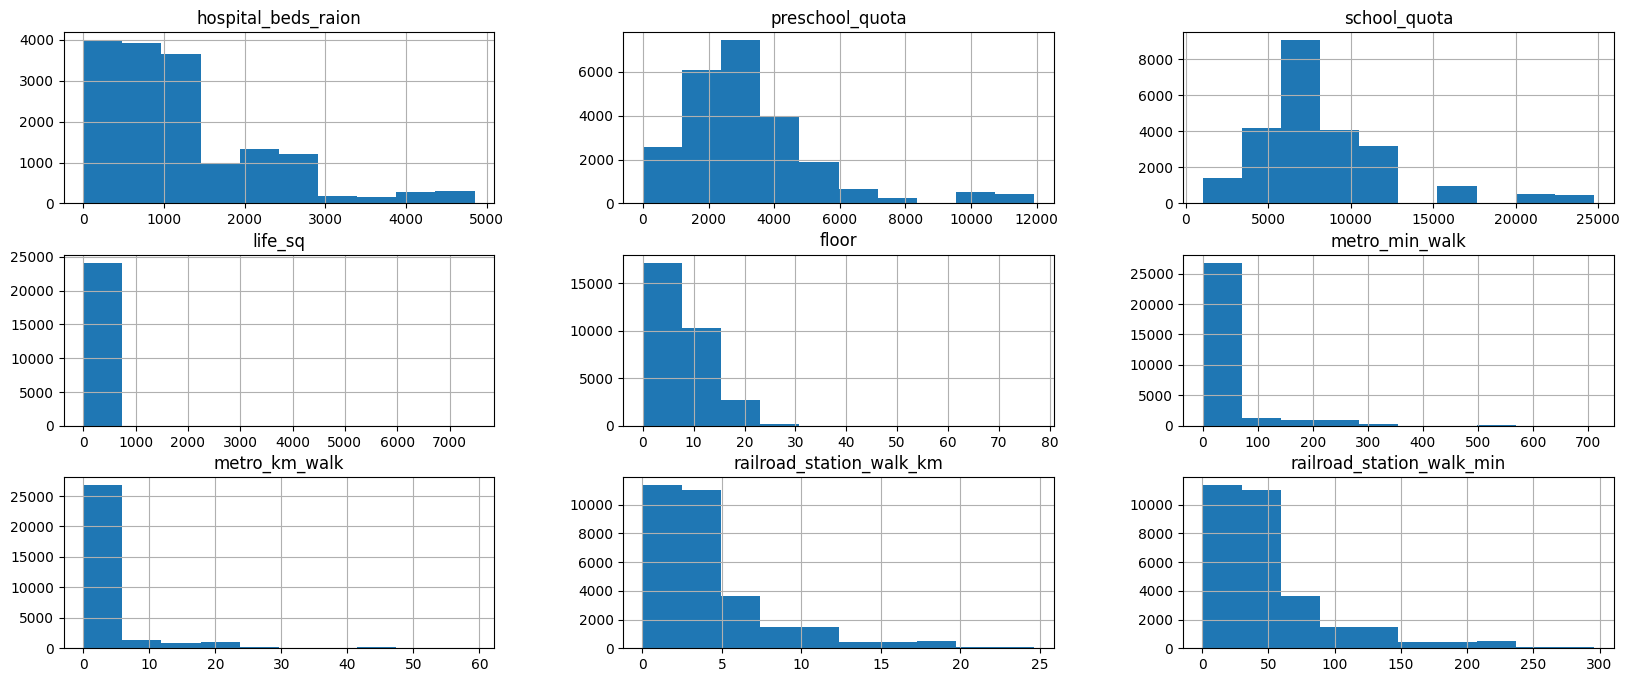

In [8]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20,8))

Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

In [11]:
fill_data = sber_data.copy()
# Создаем словарь имя столбца: число(признак)
# На который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
# Заполняем пропуски в соответствии со словарем
fill_data = fill_data.fillna(values)
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

array([[<Axes: title={'center': 'hospital_beds_raion'}>,
        <Axes: title={'center': 'preschool_quota'}>,
        <Axes: title={'center': 'school_quota'}>],
       [<Axes: title={'center': 'life_sq'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'metro_min_walk'}>],
       [<Axes: title={'center': 'metro_km_walk'}>,
        <Axes: title={'center': 'railroad_station_walk_km'}>,
        <Axes: title={'center': 'railroad_station_walk_min'}>]],
      dtype=object)

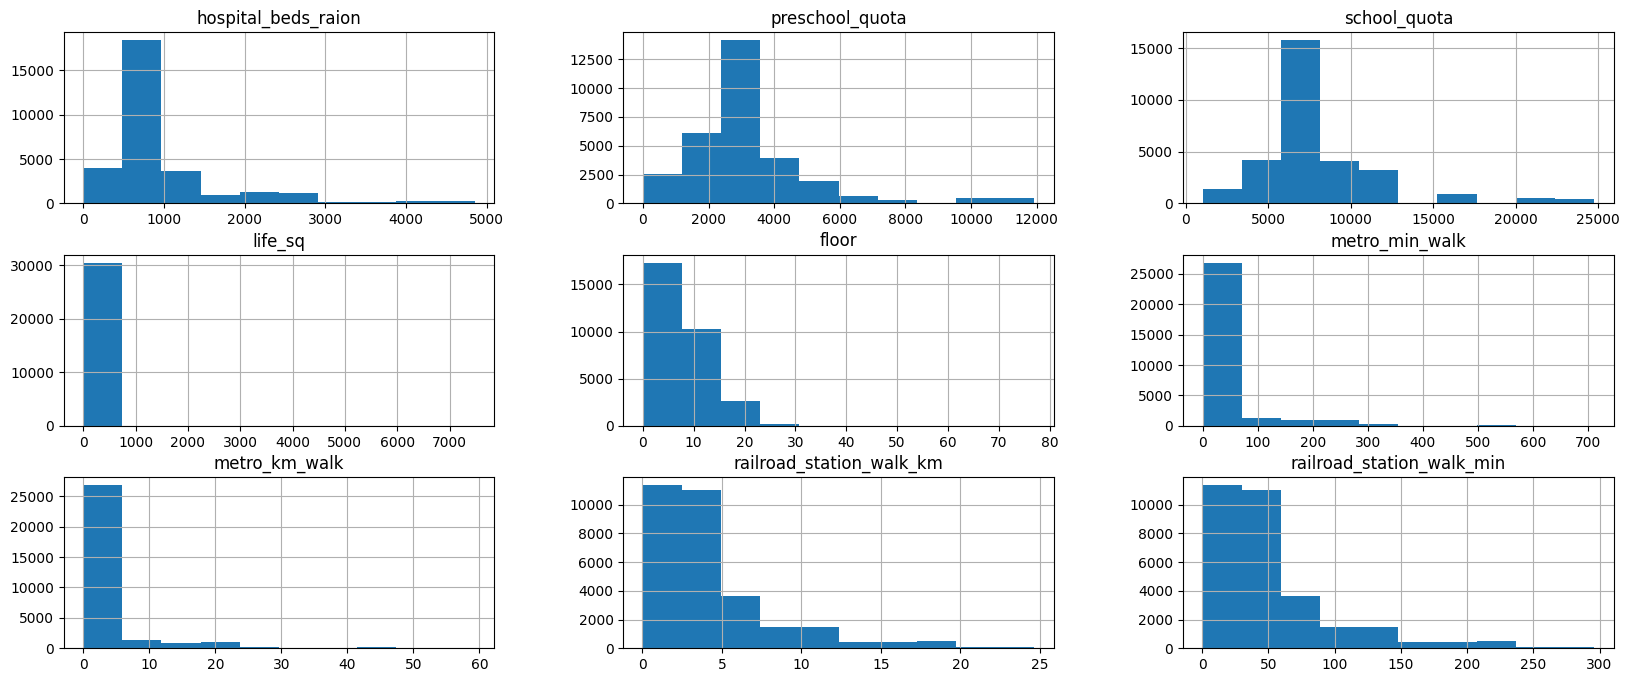

In [12]:
# Смотрим на изменения
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8))

Недостаток метода заполнения константой состоит в том, что мы можем «нафантазировать» новые данные, которые не учитывают истинного распределения.
Так же как и тут, данные сильно исказились

## Заполнение недостающих значений константами с добавлением индикатора

In [18]:
# Копируем таблицу
indicator_data = sber_data.copy()
for col in cols_with_null.index:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
# Заполням пропуски в соответствии со словарем
indicator_data = indicator_data.fillna(values)
# Выводим результат
indicator_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion_was_null,preschool_quota_was_null,school_quota_was_null,life_sq_was_null,floor_was_null,metro_min_walk_was_null,metro_km_walk_was_null,railroad_station_walk_km_was_null,railroad_station_walk_min_was_null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


## Комбинирование методов
 - удалить столбцы, в которых более 30% пропусков
 - удалить записи, в которых более 2 пропусков одновременно
 - заполнить оставшиеся ячейки константами

In [20]:
combine_data = sber_data.copy()

# Отбрасываем столбцы с числом пропусков более 30%
n = combine_data.shape[0] #Число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#Отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}

#Заполняем оставшиеся записи константами
combine_data = combine_data.fillna(values)
#Выводим результатирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_